## マイクの指向性調査

標準マイクの角度ごとのスペクトルを調べる  
0,30,45,60,90° で測定


In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from positioning.readwav import readwav
from positioning.get_spectrum_amplitude import (
    get_spectrum_amplitude,
    extract_signal_start,
)

In [3]:
sns.set()

In [4]:
angle_list = np.array([0, 30, 45, 60, 90])

In [5]:
df_mic = pd.DataFrame()
for angle in angle_list:
    signal = readwav(f"../data/mic-angle/angle{angle}.wav")
    first_i = extract_signal_start(signal, interval_length=0.2)
    spectrum = np.abs(np.fft.fft(signal[first_i : first_i + 96000]))
    freqs = np.fft.fftfreq(96000, d=1 / 48000)
    df_mic_angle = pd.DataFrame({"frequency": freqs, "spectrum": spectrum})
    df_mic_angle["angle"] = angle
    df_mic = pd.concat([df_mic, df_mic_angle])

In [6]:
df_mic.head()

,frequency,spectrum,angle
0,0.0,5.764359e+06,0
1,0.5,1.255750e+07,0
2,1.0,6.418660e+07,0
3,1.5,1.765273e+07,0
4,2.0,3.694787e+07,0


In [7]:
band_freq = np.arange(4000, 13000, 1000)
df_mic_eachband = df_mic.query("frequency in @band_freq").reset_index()
df_mic_eachband.head()

,index,frequency,spectrum,angle
0,8000,4000.0,1.174811e+06,0
1,10000,5000.0,4.644392e+05,0
2,12000,6000.0,3.477583e+05,0
3,14000,7000.0,1.242469e+05,0
4,16000,8000.0,1.548529e+05,0


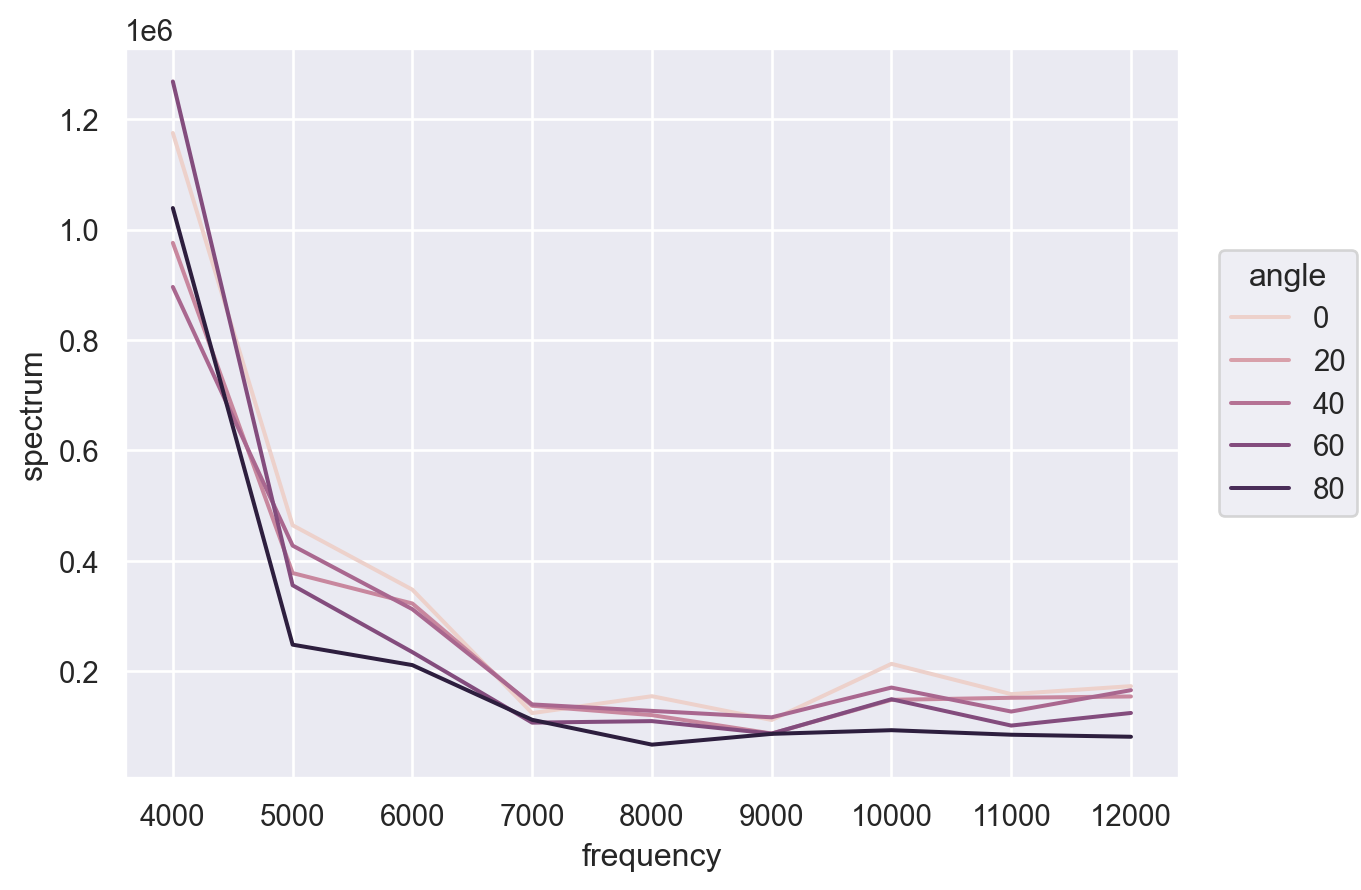

In [8]:
so.Plot(df_mic_eachband, x="frequency", y="spectrum", color="angle").add(so.Line())

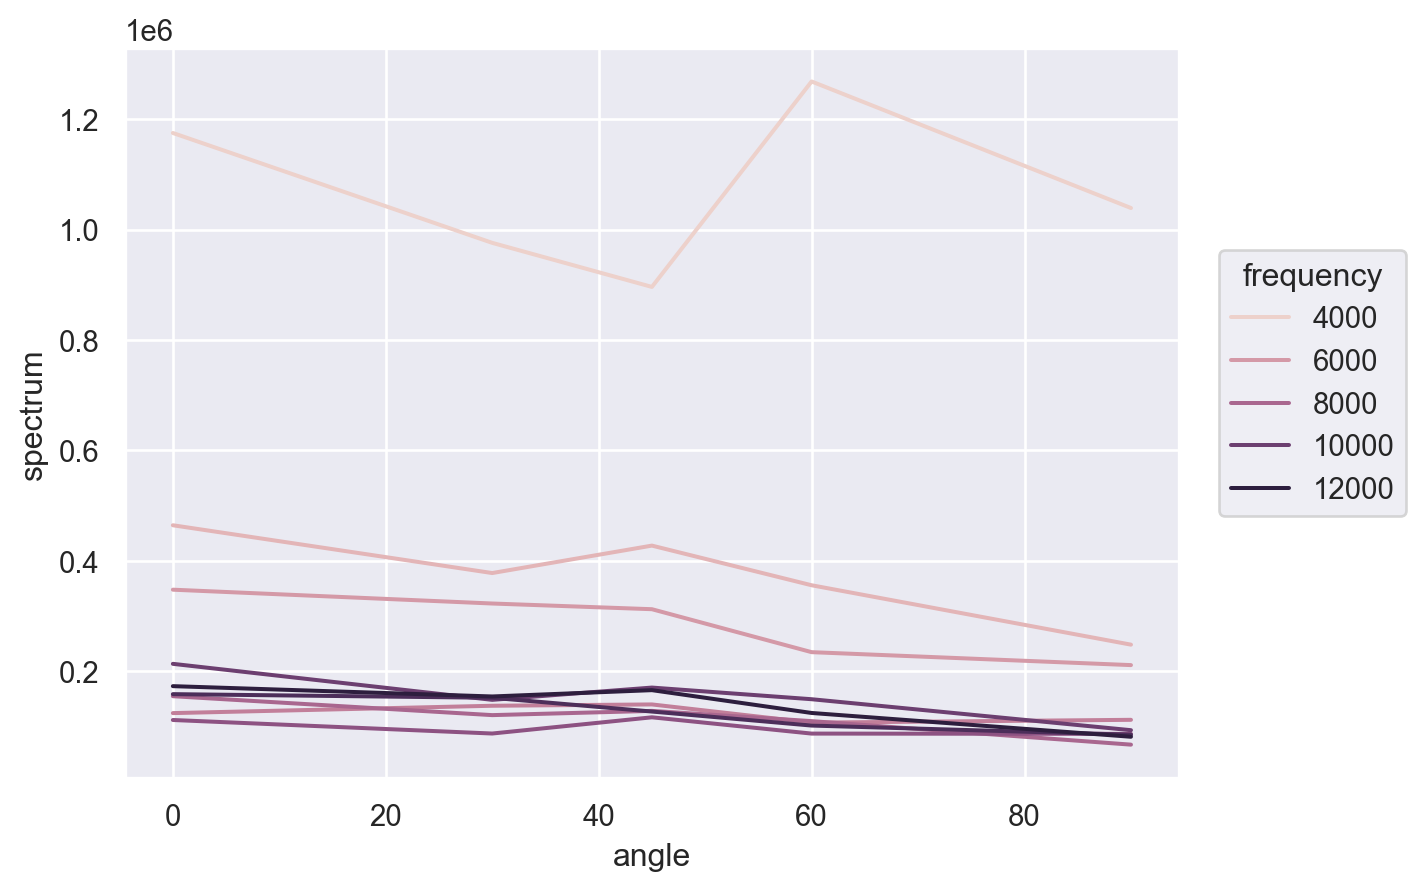

In [9]:
so.Plot(df_mic_eachband, x="angle", y="spectrum", color="frequency").add(so.Line())

In [10]:
df_mic_avg = pd.DataFrame()
for angle in angle_list:
    signal = readwav(f"../data/mic-angle/angle{angle}.wav")
    spectrum_list = np.empty(96000)
    for i in range(30):
        first_i = extract_signal_start(
            signal[i * 96000 : (i + 2) * 96000], interval_length=0.2
        )
        spectrum = np.abs(np.fft.fft(signal[first_i : first_i + 96000]))
        spectrum_list = np.vstack((spectrum_list, spectrum))
    spectrum_avg = np.mean(spectrum_list[1:, :], axis=0)
    freqs = np.fft.fftfreq(96000, d=1 / 48000)
    df_mic_angle = pd.DataFrame({"frequency": freqs, "spectrum": spectrum_avg})
    df_mic_angle["angle"] = angle
    df_mic_avg = pd.concat([df_mic_avg, df_mic_angle])

In [11]:
df_mic_avg.head()

,frequency,spectrum,angle
0,0.0,5.764359e+06,0
1,0.5,1.255750e+07,0
2,1.0,6.418660e+07,0
3,1.5,1.765273e+07,0
4,2.0,3.694787e+07,0


In [12]:
df_mic_avg_eachband = df_mic_avg.query("frequency in @band_freq").reset_index()
df_mic_avg_eachband.head()

,index,frequency,spectrum,angle
0,8000,4000.0,1.174811e+06,0
1,10000,5000.0,4.644392e+05,0
2,12000,6000.0,3.477583e+05,0
3,14000,7000.0,1.242469e+05,0
4,16000,8000.0,1.548529e+05,0


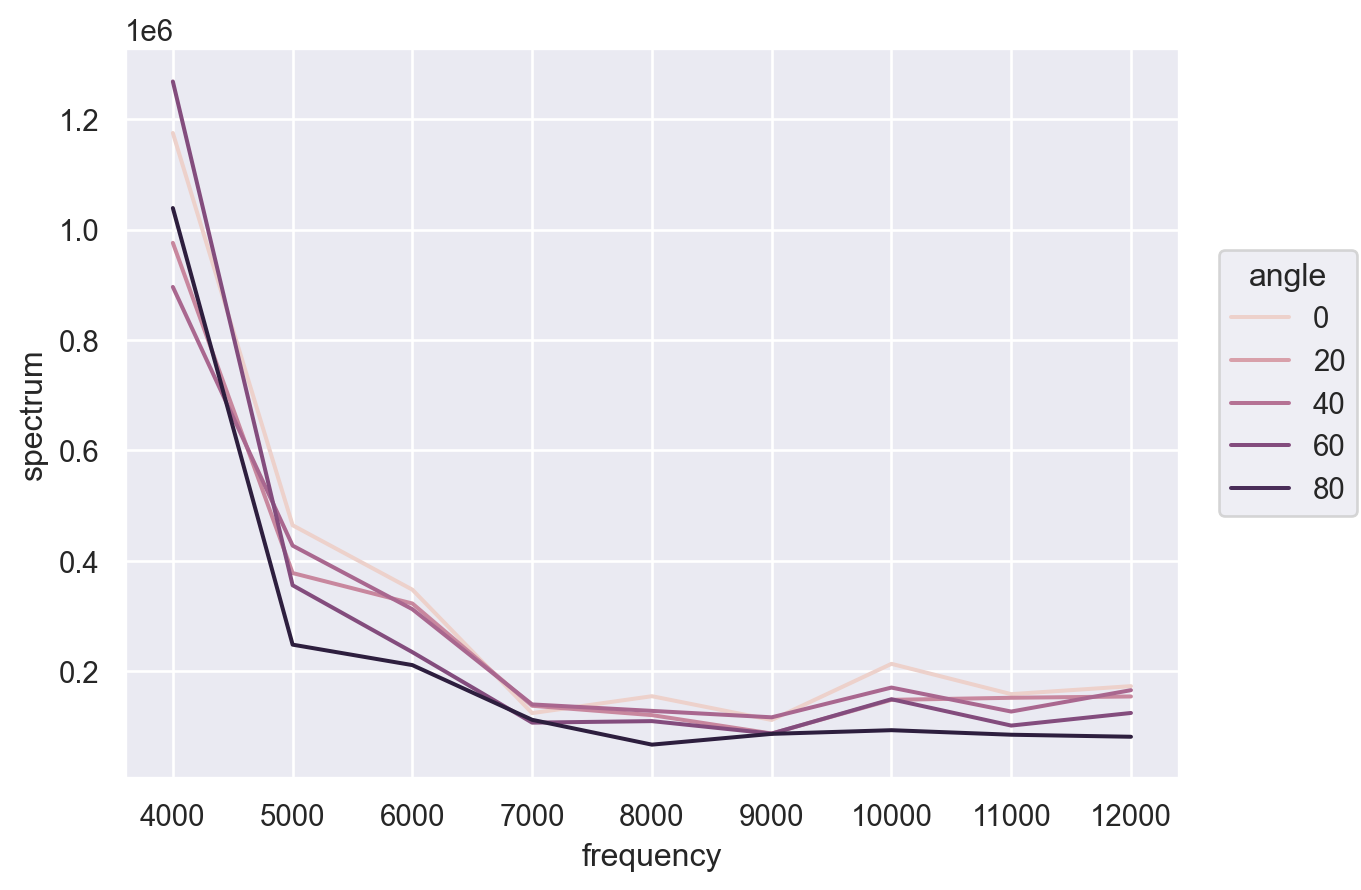

In [13]:
so.Plot(df_mic_avg_eachband, x="frequency", y="spectrum", color="angle").add(so.Line())

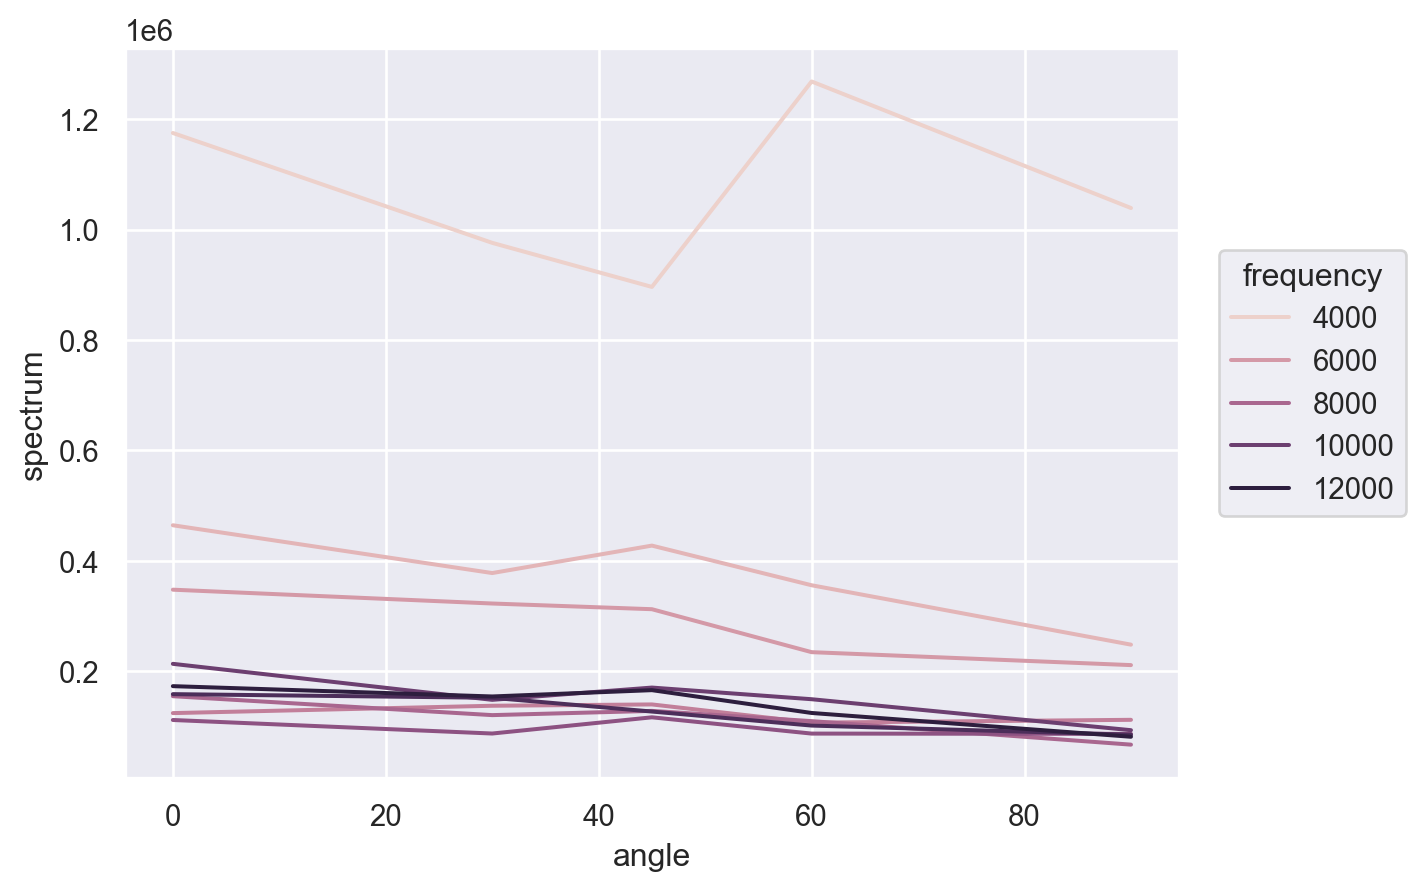

In [14]:
so.Plot(df_mic_avg_eachband, x="angle", y="spectrum", color="frequency").add(so.Line())

このあと  
バンドごとのスペクトルで見てみる  
このとき正規化してパターンを確認  
真っ直ぐにして前回の測位を再現  
差が出るかどうか


In [15]:
band_freq_label = np.linspace(4000, 5000, 4)
for i in range(5, 13):
    tmp = np.linspace(1000 * i, 1000 * (i + 1), 4)
    band_freq_label = np.concatenate([band_freq_label, tmp])
df_mic_angle_spec = pd.DataFrame()
df_mic_angle_ampli = pd.DataFrame()
for angle in angle_list:
    signal = readwav(f"../data/mic-angle/angle{angle}.wav")
    spec, ampli = get_spectrum_amplitude(signal, interval_length=0.2)
    df_tmp = pd.DataFrame({"frequency": band_freq_label, "spectrum": spec})
    df_tmp["angle"] = angle
    df_ampli_tmp = pd.DataFrame({"amplitude": [ampli], "angle": [angle]})
    df_mic_angle_spec = pd.concat([df_mic_angle_spec, df_tmp])
    df_mic_angle_ampli = pd.concat([df_mic_angle_ampli, df_ampli_tmp])
df_mic_angle_spec.reset_index(inplace=True, drop=True)
df_mic_angle_ampli.reset_index(inplace=True, drop=True)

In [16]:
df_mic_angle_spec.head()

,frequency,spectrum,angle
0,4000.000000,0.562421,0
1,4333.333333,0.919728,0
2,4666.666667,1.000000,0
3,5000.000000,0.548380,0
4,5000.000000,0.484947,0


In [17]:
df_mic_angle_spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   frequency  180 non-null    float64
 1   spectrum   180 non-null    float64
 2   angle      180 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [18]:
df_mic_angle_spec["frequency"].unique()

array([ 4000.        ,  4333.33333333,  4666.66666667,  5000.        ,
        5333.33333333,  5666.66666667,  6000.        ,  6333.33333333,
        6666.66666667,  7000.        ,  7333.33333333,  7666.66666667,
        8000.        ,  8333.33333333,  8666.66666667,  9000.        ,
        9333.33333333,  9666.66666667, 10000.        , 10333.33333333,
       10666.66666667, 11000.        , 11333.33333333, 11666.66666667,
       12000.        , 12333.33333333, 12666.66666667, 13000.        ])

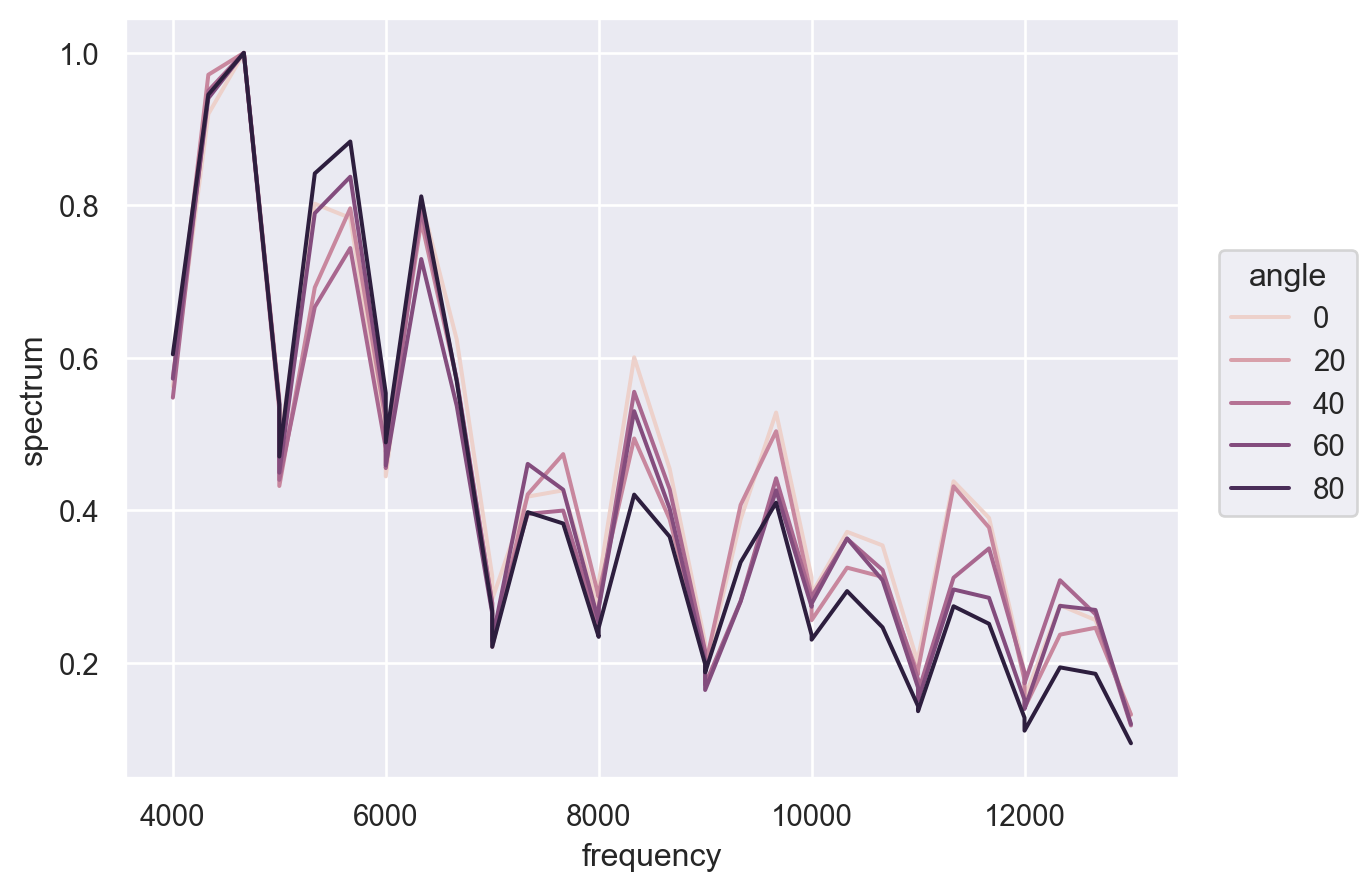

In [19]:
(so.Plot(df_mic_angle_spec, x="frequency", y="spectrum", color="angle").add(so.Line()))

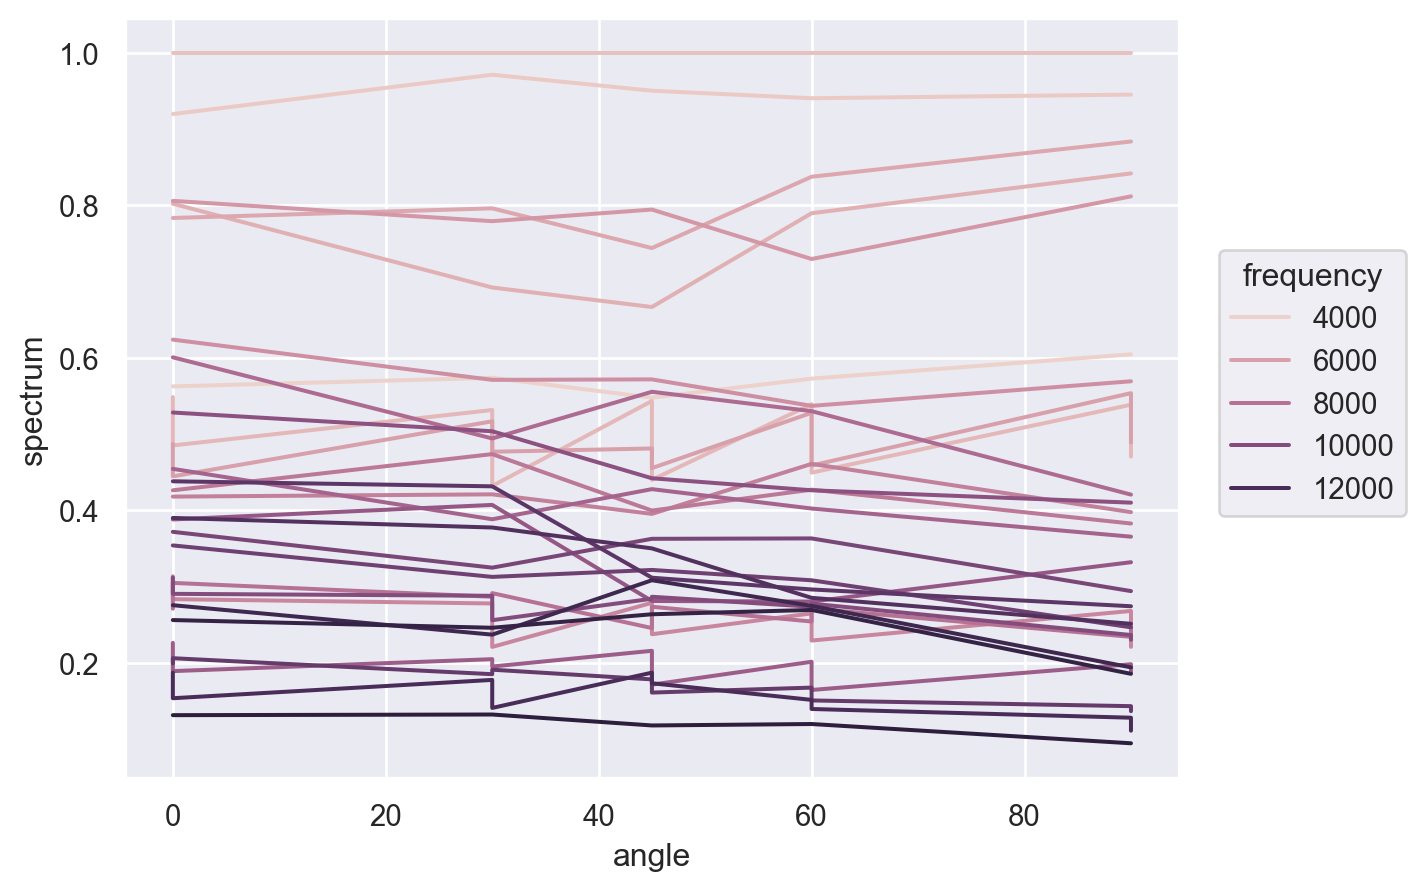

In [20]:
so.Plot(df_mic_angle_spec, x="angle", y="spectrum", color="frequency").add(so.Line())

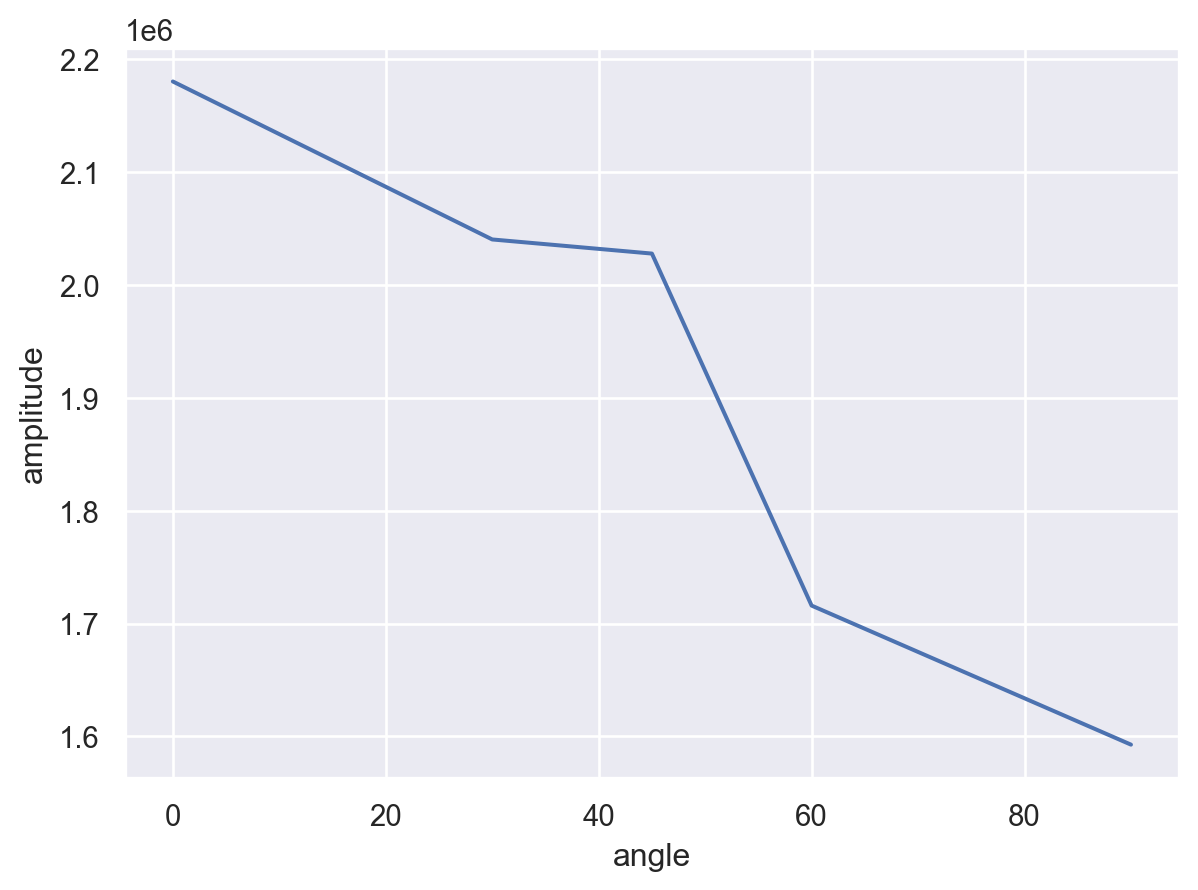

In [21]:
so.Plot(df_mic_angle_ampli, x="angle", y="amplitude").add(so.Line())

スペクトルの 5kHz 付近が全然出てないのがおかしそうなのでコード確認する  
→ パラメータ間違ってた、インターバル 0.2 に直した  
強度は 4k だけでなく、全部の相互相関で出してみる


In [22]:
df_mic_angle_ampli_allband = pd.DataFrame()
for angle in angle_list:
    signal = readwav(f"../data/mic-angle/angle{angle}.wav")
    spec, ampli = get_spectrum_amplitude(signal, interval_length=0.2, ampli_band="all")
    df_ampli_tmp = pd.DataFrame({"amplitude": [ampli], "angle": [angle]})
    df_mic_angle_ampli_allband = pd.concat([df_mic_angle_ampli_allband, df_ampli_tmp])
df_mic_angle_ampli_allband.reset_index(inplace=True, drop=True)

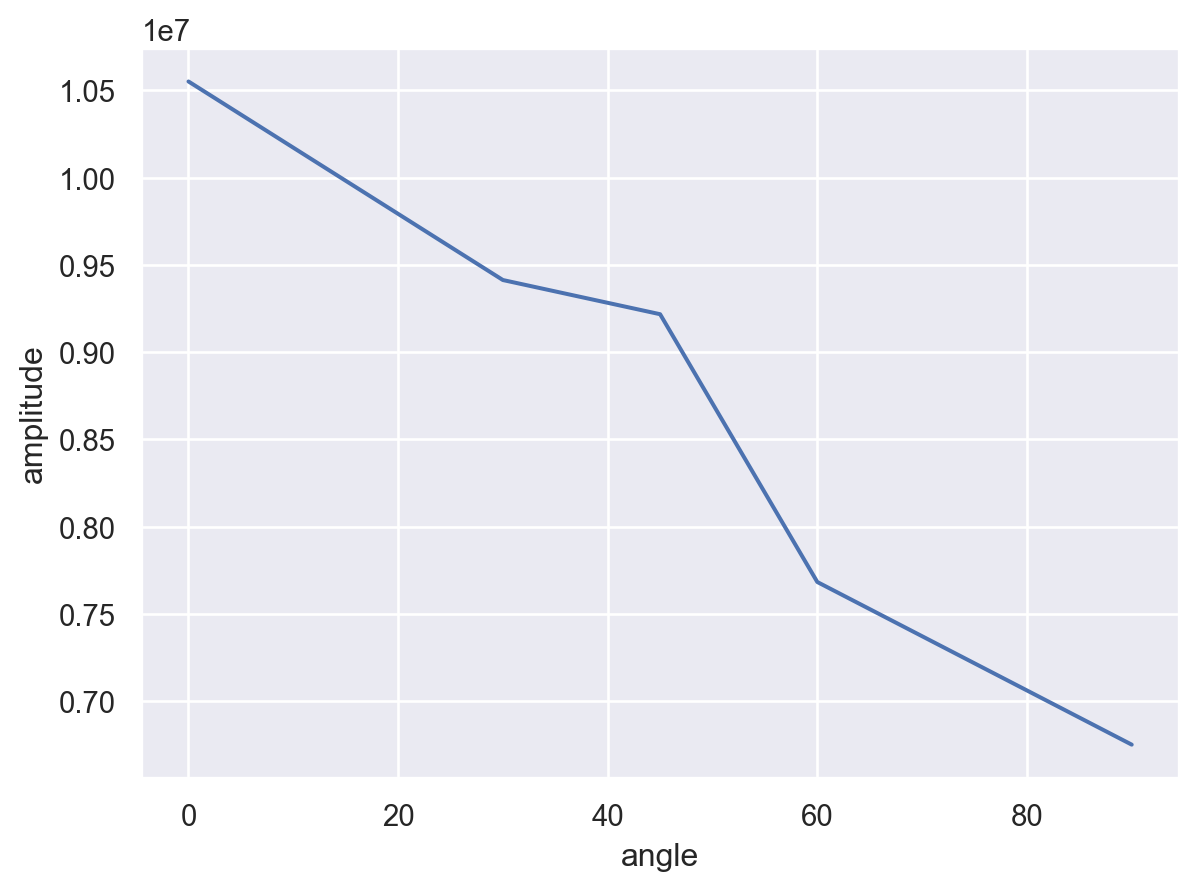

In [23]:
so.Plot(df_mic_angle_ampli_allband, x="angle", y="amplitude").add(so.Line())

30 回分の平均で見てみる


In [24]:
df_mic_angle_spec_avg = pd.DataFrame()
df_mic_angle_ampli_avg = pd.DataFrame()
for angle in angle_list:
    signal = readwav(f"../data/mic-angle/angle{angle}.wav")
    spec_list = np.empty(36)
    ampli_list = np.empty(1)
    for i in range(30):
        spec, ampli = get_spectrum_amplitude(signal, interval_length=0.2)
        spec_list = np.vstack((spec_list, spec))
        ampli_list = np.vstack((ampli_list, ampli))
    spec_avg = np.mean(spec_list[1:, :], axis=0)
    ampli_avg = np.mean(ampli_list[1:, :], axis=0)
    df_tmp = pd.DataFrame({"frequency": band_freq_label, "spectrum": spec_avg})
    df_tmp["angle"] = angle
    df_ampli_tmp = pd.DataFrame({"amplitude": ampli_avg, "angle": angle})
    df_mic_angle_spec_avg = pd.concat([df_mic_angle_spec_avg, df_tmp])
    df_mic_angle_ampli_avg = pd.concat([df_mic_angle_ampli_avg, df_ampli_tmp])
df_mic_angle_spec_avg.reset_index(inplace=True, drop=True)
df_mic_angle_ampli_avg.reset_index(inplace=True, drop=True)

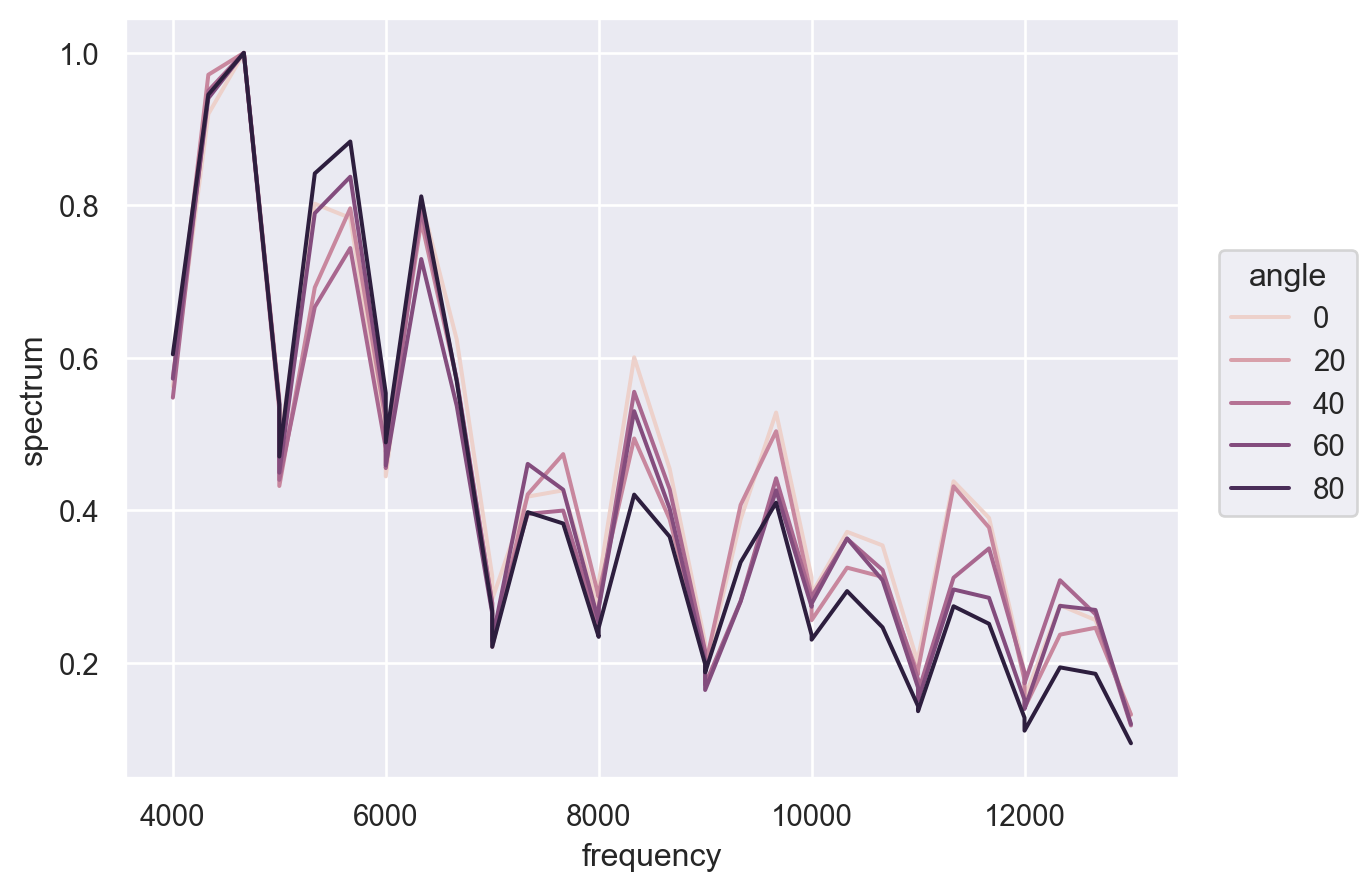

In [25]:
(
    so.Plot(df_mic_angle_spec_avg, x="frequency", y="spectrum", color="angle").add(
        so.Line()
    )
)

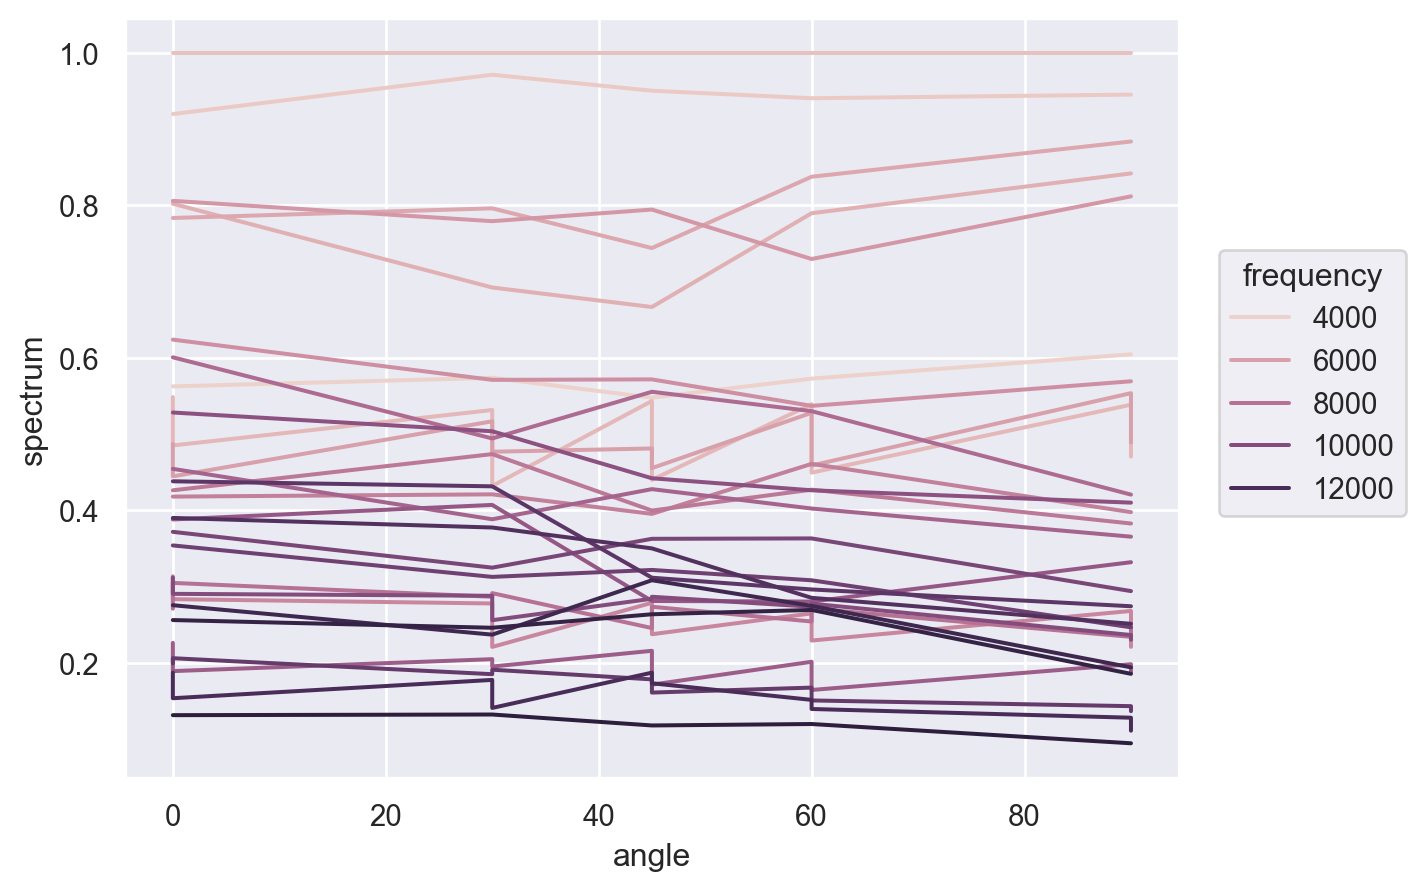

In [26]:
(
    so.Plot(df_mic_angle_spec_avg, x="angle", y="spectrum", color="frequency").add(
        so.Line()
    )
)

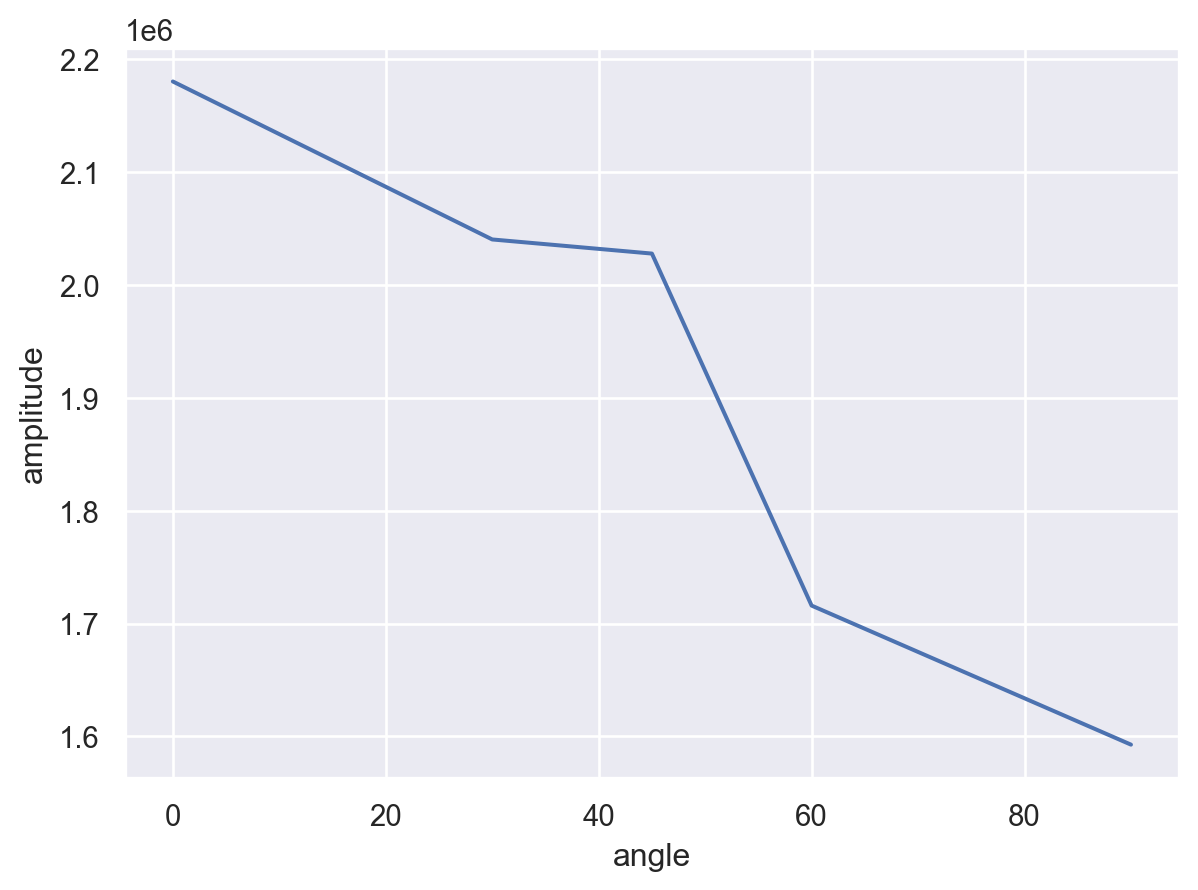

In [28]:
(so.Plot(df_mic_angle_ampli_avg, x="angle", y="amplitude").add(so.Line()))

マイクの補正も考える  
スピーカーの角度、マイクの角度の畳み込みで、（スピーカーの角度, マイクの角度, スペクトル）のデータベースを新たに作成  
補正しなかった場合と比較して精度が上がることを見せ、北海道シンポジウムの成果にする
